In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("customer_churn_data.csv")

In [10]:
df.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [13]:
df.isna().sum().sum()

np.int64(297)

In [15]:
df["InternetService"] = df["InternetService"].fillna("")

In [16]:
df.isna().sum().sum()

np.int64(0)

In [17]:
df.head() 

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [20]:
numeric_columns_data = df.select_dtypes(include=["number"])

In [21]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [27]:
import matplotlib.pyplot as plt

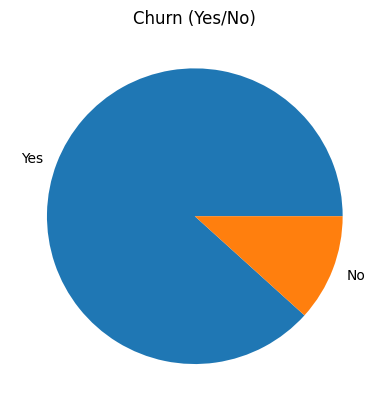

In [28]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [29]:
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [31]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

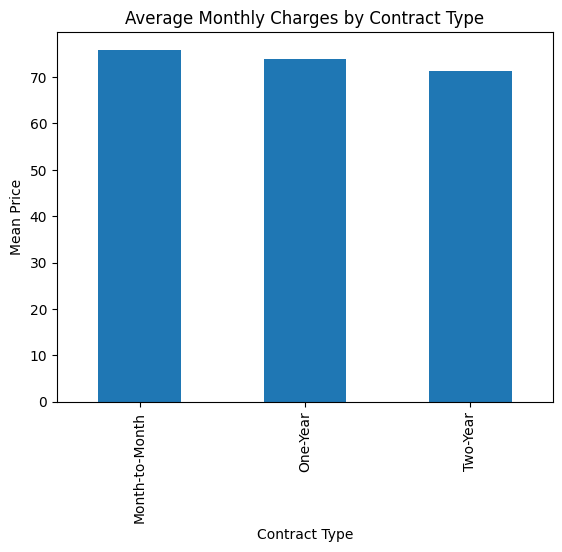

In [32]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Average Monthly Charges by Contract Type")
plt.show()

In [33]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [34]:
Y = df[["Churn"]]
X = df[["Age","Gender","Tenure","MonthlyCharges"]]


In [42]:
X # 1 Female and 0 male

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [41]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\Seema\AppData\Local\Temp\ipykernel_6400\2388402656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [38]:
Y


,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [43]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [44]:
Y["Churn"] = Y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

C:\Users\Seema\AppData\Local\Temp\ipykernel_6400\3920258728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Churn"] = Y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [46]:
Y.head(10)

,Churn
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [49]:
#Model Building 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

In [139]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [55]:
X_test = scaler.fit_transform(X_test)

In [58]:
from sklearn.metrics import accuracy_score

def modelperformance(prediction):
    print("Accuracy Score on Model is : ", accuracy_score(Y_test, prediction))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Define the model
model = LogisticRegression(solver='liblinear', class_weight='balanced')

# Hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, Y_train)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)

y_pred = best_model.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


joblib.dump(best_model, "model.pkl")


Best Params: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.23      0.73      0.35        22
           1       0.95      0.70      0.81       178

    accuracy                           0.70       200
   macro avg       0.59      0.71      0.58       200
weighted avg       0.87      0.70      0.75       200



['model.pkl']

In [69]:
from sklearn.neighbors import KNeighborsClassifier


In [71]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
}

In [72]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5)

In [73]:
gridkn.fit(X_train,Y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [74]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [76]:
y_pred = gridkn.predict(X_test)

In [77]:
modelperformance(y_pred)

Accuracy Score on Model is :  0.89
